# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 25px; color: #2D2926; text-align: center; line-height: 0.75;background-color: #41dcf7"><b>Unsupervised Learning on Country Data</b><br></h1>

### Objective:
- To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
- HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Links:
[Unsupervised Learning on Country Data (Kaggle)](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)

[Based on this notebook](https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical)



# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Data Preprocessing/Information</div></center>

### Importing Libraries:

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [68]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [69]:
df.isna().sum().to_frame().T

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,0,0,0,0,0,0,0,0,0


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

In [70]:
# DataFrame for clutering
df_to_cluster = df.drop('country', axis=1)
# Data correlation
fig = px.scatter_matrix(df_to_cluster, dimensions=df_to_cluster.columns, width=900, height=800)
fig.show()

<AxesSubplot:>

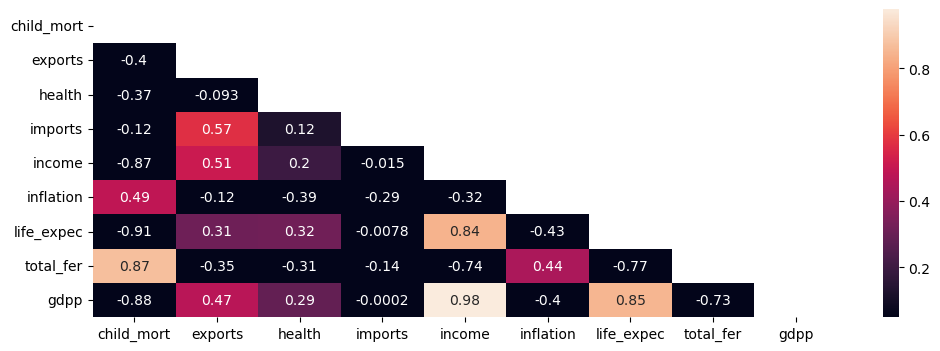

In [71]:
coors = df_to_cluster.corr(method='spearman')
mask = np.zeros_like(coors, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(coors, mask=mask, vmin=0.05, annot=True)

- **Highly positive correlation:** gdpp and income ($corr=0.98$), gdpp and life expectancy ($corr=0.85$), total_fer and child_mort ($corr=0.87$), life_expectancy and income ($corr=0.84$)

- **Highly negative correlation:** gdpp and child_mort ($corr=-0.88$), total_fer and income ($corr=-0.74$), total_fer and life_expectancy ($corr=-0.77$), life_expectancy and child_mort ($corr=-0.91$), child_mort and income ($corr=-0.87$)

### Cheking the variables distribuition:

If the variables have a Shapiro p-value > 0.05, it is considered normally distributed.

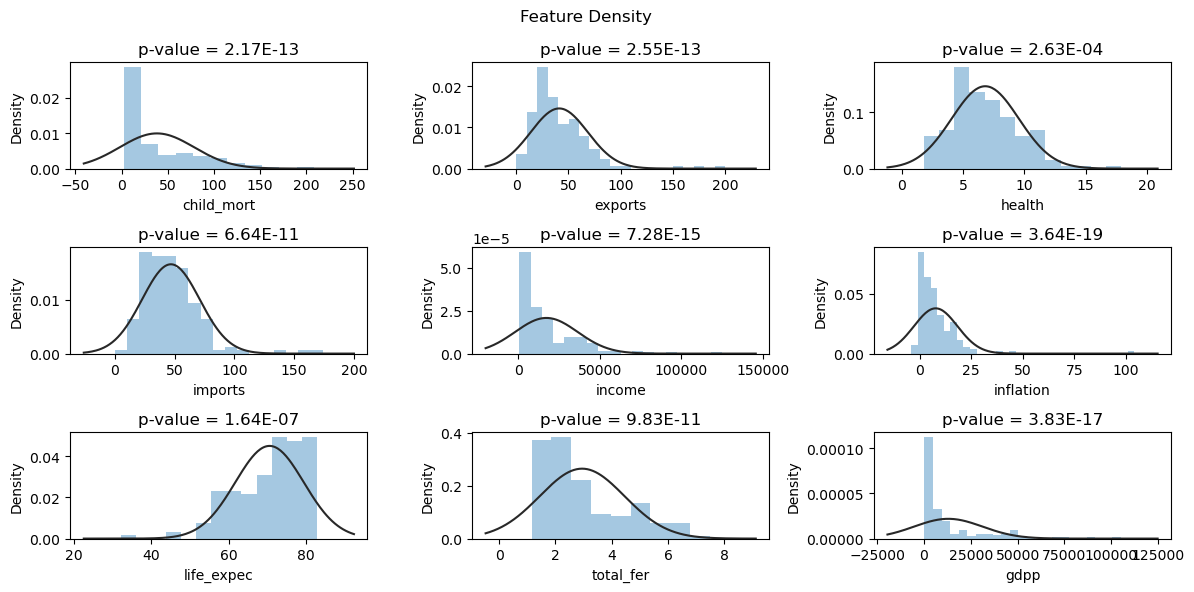

In [72]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))
fig.suptitle('Feature Density')

for i, name in enumerate(df_to_cluster.columns):
    plt.subplot(3,3,i+1)
    sns.distplot(df_to_cluster[name], kde=False, fit=stats.norm)
    plt.ylabel('Density')
    plt.title(f'p-value = {stats.shapiro(df_to_cluster[name]).pvalue:.2E}')
fig.tight_layout()

- Considering a threshold of p-value > 0.05 for being normally distributed, all features above are non-normally distributed. The Health feature is the most well-suited, with a p-value of 0.00062.

- Life Expectancy is negatively skewed (or left-skewed) and all the others are positively skewed (or right-skewed).

# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

- **Normalization** is a useful technique to rescale features to a similar range of values, typically between $[0, 1]$ or $[-1, 1]$, which can be helpful for many machine learning models. It can also be helpful in adjusting non-Gaussian distribution features. Outliers can have a significant impact on normalization, as they can distort the range of values used for scaling the data. This can result in a compressed range of values for the majority of the data. On the other hand, **Standardization** has no range restrictions and is much less affected by outliers.

In [73]:
df_fe = df_to_cluster.copy()

norm = MinMaxScaler()
stard = StandardScaler()

#df_fe[['health']] = stard.fit_transform(df_fe[['health']])
cols = df_fe.columns.tolist()
#cols.remove('health')

df_fe[cols] = norm.fit_transform(df_fe[cols])
df_fe.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [74]:
#PCA with 95% of variance
model_pca = PCA(0.95)
df_pca = model_pca.fit_transform(df_fe)
print(model_pca.explained_variance_ratio_.cumsum())

[0.55001227 0.6838601  0.80687063 0.9043611  0.94214073 0.97227732]


# <center><div style="font-family: Trebuchet MS; background-color: #41dcf7; color: #2D2926; padding: 12px; line-height: 1;">Clustering Model - Kmeans </div></center>

### K-means:

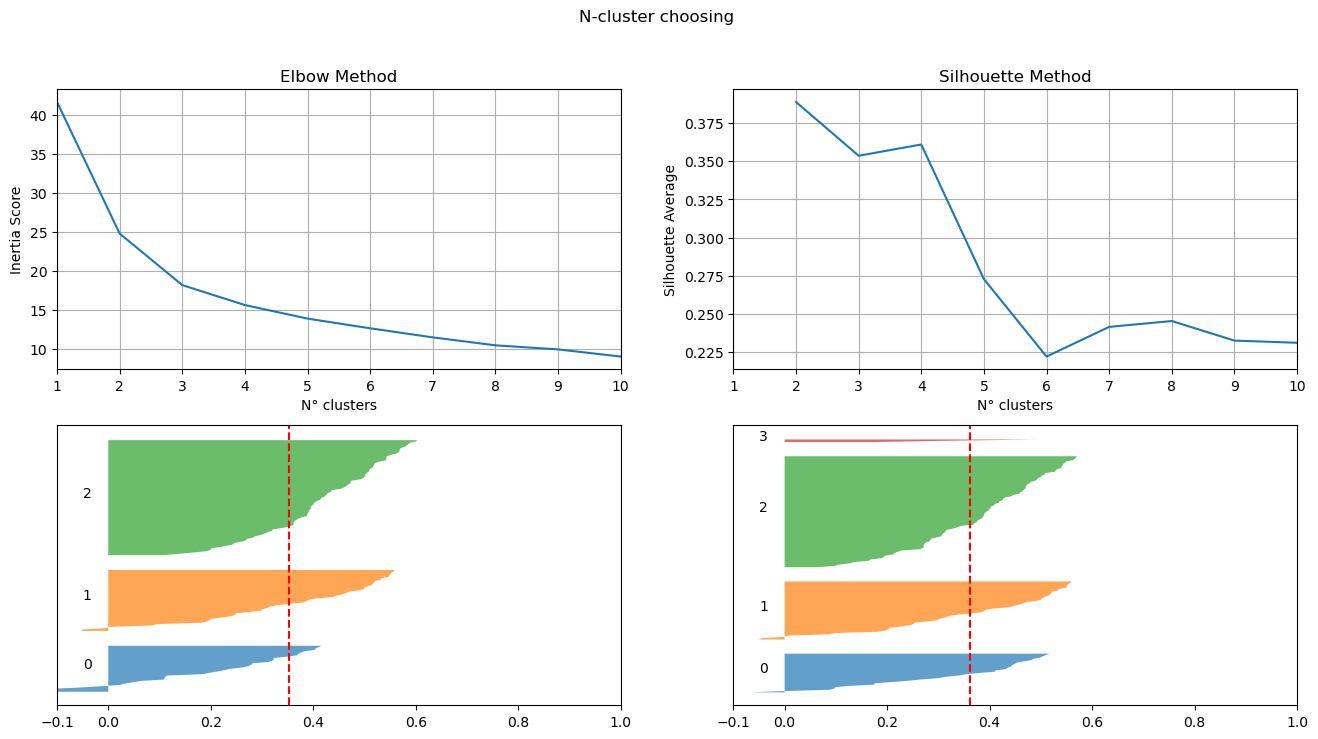

In [75]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.suptitle('N-cluster choosing')

inert = []; n_clust=11;
for i in range(1, n_clust):
    model_KMeans = KMeans(n_clusters=i, random_state=12).fit(df_pca)
    inert.append(model_KMeans.inertia_)
plt.subplot(2,2,1)
plt.plot(list(range(1,n_clust)), inert)
plt.xlabel('N° clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method')
plt.xlim(1,10)
plt.grid()


sil = []; sil_samples = []
for i in range(2, n_clust):
    model_KMeans = KMeans(n_clusters=i, random_state=12).fit_predict(df_pca)
    sil.append(silhouette_score(df_pca, model_KMeans))
    sil_samples.append(silhouette_samples(df_pca, model_KMeans))
plt.subplot(2,2,2)
plt.plot(list(range(2,n_clust)), sil)
plt.xlabel('N° clusters')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Method')
plt.xlim(1,10)
plt.grid()


#From: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
list_clust = [3, 4]; l = 0;
for p in list_clust:
    l+=1
    y_lower = 10
    n_clusters = p
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=12).fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)
    plt.subplot(2,2,2+l)
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            #facecolor=color,
            #edgecolor=color,
            alpha=0.7,
        )
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.yticks([])  
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

- Elbow method: Looking for the Elbow graph, it's clear that there is an elbow when $n_{cluster} = 3$.
- Silhouette Method: The higher the Silhouette Average is, the more suitable it is ($n_{cluster} = 2,~3~or~4$ are good choices). For $n_{cluster} = 3$, the thickness of the plots is more or less similar, so it can be considered a good choice.

In [76]:
# Running Kmeans
model_KMeans = KMeans(n_clusters=3, random_state=12)
clusters = model_KMeans.fit_predict(df_pca)
np.unique(clusters, return_counts=True)

(array([0, 1, 2], dtype=int32), array([35, 46, 86]))

### PCA 2D Plot:

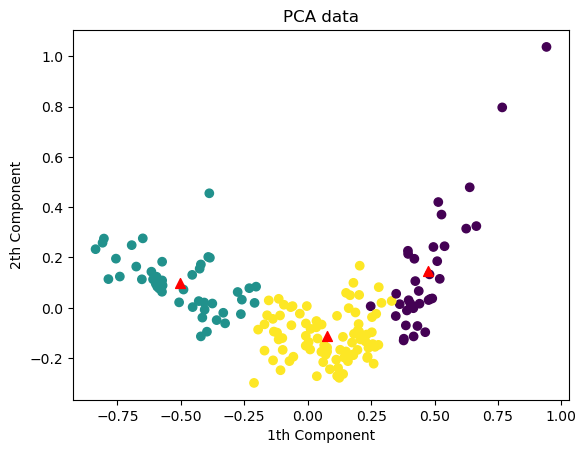

In [85]:
plt.scatter(df_pca[:,0],df_pca[:,1], c = clusters)
plt.scatter(model_KMeans.cluster_centers_[:,0], model_KMeans.cluster_centers_[:,1], 
            color ='r', marker='^', s=50)
plt.title('PCA data')
plt.xlabel('1th Component')
plt.ylabel('2th Component')
plt.show()

In [ ]:
df['Class'] = clusters
fig, ax = plt.subplots(1, 4, figsize=(16,5))
fig.suptitle('Key Features vs Classes Boxplot')

plt.subplot(1,4,1)
sns.boxplot(y='child_mort', x='Class', data=df) 

plt.subplot(1,4,2)
sns.boxplot(y='health', x='Class', data=df) 

plt.subplot(1,4,3)
sns.boxplot(y='income', x='Class', data=df) 

plt.subplot(1,4,4)
sns.boxplot(y='life_expec', x='Class', data=df) 

fig.tight_layout()

- Countries with high health, income, and life expectancy, as well as low child mortality, are considered developed countries and do not require assistance.
- Countries with low health, income, and life expectancy, as well as high child mortality, are considered underdeveloped countries and require assistance.
- Classes:
    - Class 0: Does Not Require Assistance
    - Class 1: Require Assistance
    - Class 2: May Require Assistance

In [ ]:
mapping = {0: 'Does Not Require Assistance', 1: 'Require Assistance', 2:'May Require Assistance'}
#mapping = {0: 'Bom', 1: 'Pessimo', 2:'Medio', 3:'Muito bom'}
df['Class_name'] = df['Class'].map(mapping)


fig = px.choropleth(df[['country','Class_name']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Assistance Help Per Country (World)',
                    color = df['Class_name'],
                    color_discrete_map = {'Require Assistance':'Red',
                                        'Does Not Require Assistance':'Green',
                                        'May Require Assistance':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

- In the above image, we can identify three groups of countries: those in green with good indices that do not require assistance (North America, Western Europe, and some parts of Oceania); those in yellow with moderate indices that may require assistance (South America, most of Asia, North and South Africa); and those in red with low indices that require assistance (Central Africa and some countries in the Middle East).